<h2 style="color:blue" align="center">Handwritten digits classification using CNN</h2>

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

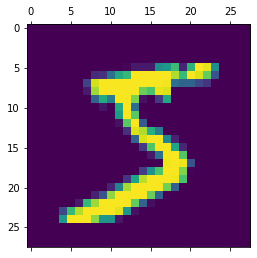

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

<h3 style='color:purple'>Using ANN for classification</h3>

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2678 - accuracy: 0.9240
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1219 - accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0856 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0651 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0416 - accuracy: 0.9872: 0s - loss: 0.0 - ETA: 0s - loss: 0.0407 - ac
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0335 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0272 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0243 - accuracy: 0.9926
Epoch 10/10
1875/1875 [=============

In [10]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 0.9777


[0.0822930708527565, 0.9776999950408936]

In [11]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

<h3 style='color:purple'>Using CNN for classification</h3>

In [13]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1588 - accuracy: 0.9526
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0542 - accuracy: 0.9839
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0372 - accuracy: 0.9881
Epoch 4/5
1363/1875 [====================>.........] - ETA: 7s - loss: 0.0242 - accuracy: 0.9923

In [ ]:
y_train[:5]

In [ ]:
model.evaluate(X_test,y_test)

# CNN is achieved high accuracy faster than ANN

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [21]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [22]:
X_train_flattened.shape

(60000, 784)

In [23]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4650 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9258


In [25]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2683 - accuracy: 0.9242


[0.26828867197036743, 0.9241999983787537]

In [26]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.1357805e-02, 3.4613132e-07, 6.8195671e-02, 9.5249319e-01,
       2.0257533e-03, 1.1251667e-01, 7.3986058e-07, 9.9976975e-01,
       9.3358129e-02, 6.8803233e-01], dtype=float32)

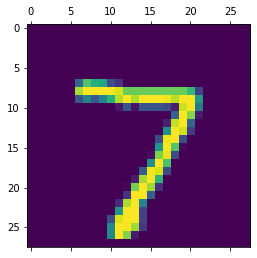

In [27]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [28]:
np.argmax(y_predicted[0])

7

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [30]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    3,    0,    7,    6,    2,    2,    0],
       [   0, 1116,    3,    2,    0,    2,    4,    2,    6,    0],
       [   3,    9,  924,   22,    7,    6,   11,   10,   36,    4],
       [   1,    0,   15,  931,    0,   30,    2,   10,   14,    7],
       [   1,    1,    7,    3,  910,    0,   10,    5,    9,   36],
       [   7,    2,    5,   31,    6,  796,    9,    6,   24,    6],
       [  10,    3,    6,    1,    7,   23,  903,    2,    3,    0],
       [   1,    6,   22,   10,    3,    1,    0,  957,    1,   27],
       [   5,   10,    7,   36,    9,   45,    8,   13,  835,    6],
       [  10,    7,    2,   12,   25,   10,    0,   29,    2,  912]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

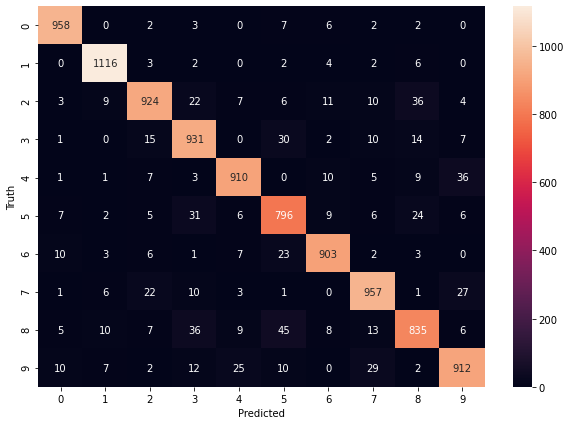

In [31]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [32]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2748 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1240 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0880 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0672 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0539 - accuracy: 0.9840


In [33]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9743


[0.085445336997509, 0.9743000268936157]

Text(69.0, 0.5, 'Truth')

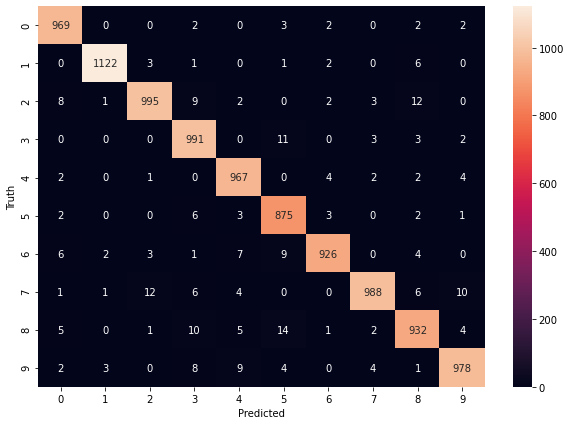

In [34]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>


In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2723 - accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1207 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0831 - accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0630 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0500 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0398 - accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0325 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0260 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0225 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.018

In [36]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9782


[0.0780254453420639, 0.9782000184059143]